# 1. Import libraries and data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# define project folder path
path = r'C:\Users\nsmith\OneDrive - Georgia Poultry Laboratory Network\CareerFoundry\02 - Data Immersion\Achievement 4\12-2024 Instacart Basket Analysis'

In [4]:
# import project data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'completed_data.pkl'))

   # 2. Inspect data

In [5]:
# view first 10 rows
ords_prods_merge.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,False,196,2,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,False,196,4,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
# describe dataset
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [7]:
# view the mean
ords_prods_merge['prices'].mean()

7.790994092173359

In [8]:
# view the median
ords_prods_merge['prices'].median()

7.4

In [9]:
# view the max
ords_prods_merge['prices'].max()

25.0

# 3. Sampling Data

#### Split the data into a 70/30 ratio using random numbers

In [10]:
# Assign the seed value to ensure reproducibility
np.random.seed(4)

In [11]:
# store boolean values representing above/below 0.7 to new list the same length as dataframe
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [12]:
# split data frame into two samples; big where dev = true
big = ords_prods_merge[dev]

In [13]:
# split data frame into two samples; small where dev = false
small = ords_prods_merge[~dev]

#### Check length of samples against dataframe length

In [14]:
# check length of original dataframe
len(ords_prods_merge)

32404859

In [15]:
# add length of two samples
len(big) + len(small)

32404859

#### Filter to only necessary columns to improve processing speed

In [16]:
# create new df from small sample with only dow and price columns
df_2 = small[['order_day_of_week', 'prices']]

In [32]:
# create new df from small sample with only hour of day and price columns
df_3 = small[['order_hour_of_day', 'prices']]

In [38]:
# create new df from small sample with only hour of day and price columns
df_4 = small[['age', 'n_dependants']]

# 4. Create visualizations

## Bar chart

### Exercise: Order Day of Week

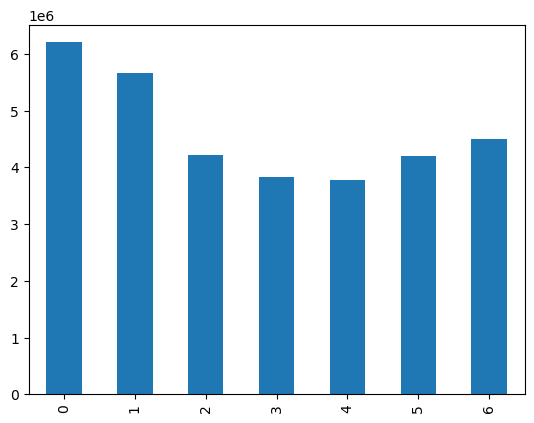

In [48]:
# create a bar chart, but sort on the column index
bar_day = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

### Task: Loyalty Flag

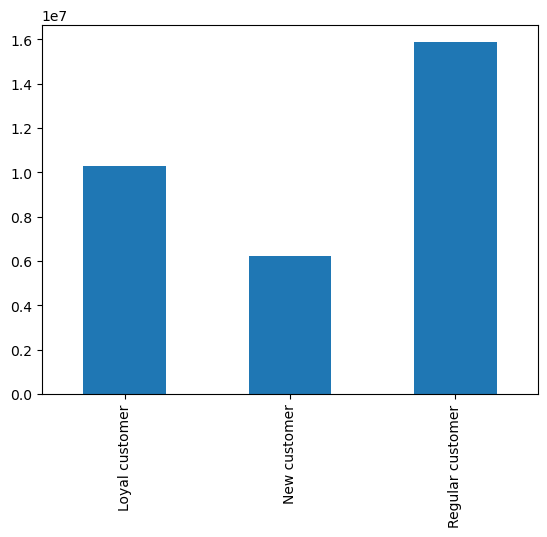

In [47]:
# create a bar chart of loyalty flag
bar_loyal = ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

## Histograms

### Exercise: Prices

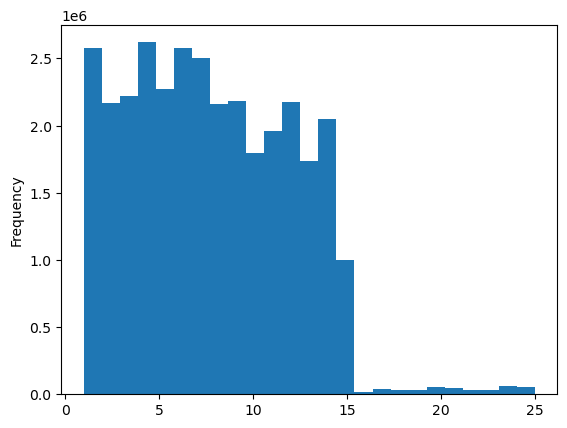

In [46]:
# create a histogram of prices column
hist_prices = ords_prods_merge['prices'].plot.hist(bins = 25)

### Task: Order Hour of Day

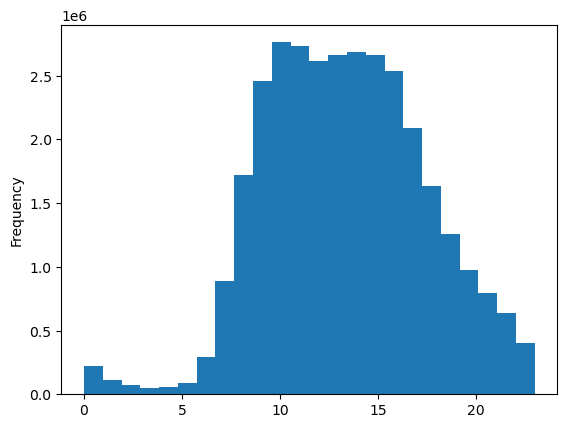

In [45]:
# create a histogram of prices column
hist_hour = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram above shows the frequency of observations for each hour of the day (24 bins.) Many of the observations occur during normal business hours, as would be expected. Far fewer observations occur in the early morning hours, before 7 am.

## Scatterplots

### Exercise: Prices x Prices

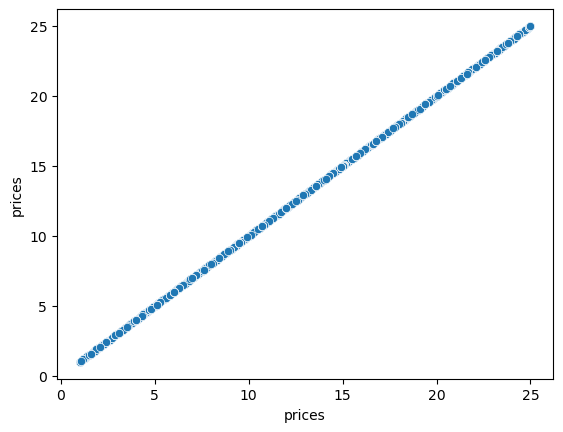

In [44]:
# create a scatterplot of the prices to identify outliers using seaborn
scatter_prices = sns.scatterplot(x = 'prices', y = 'prices', data = small)

### Task: Relationship of age and income

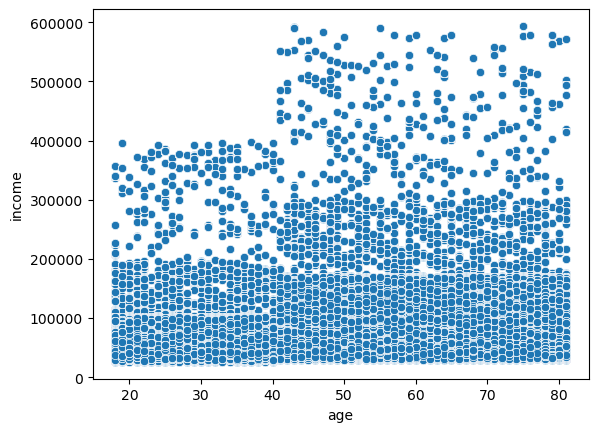

In [42]:
# create a scatterplot
scatter_income = sns.scatterplot(x = 'age', y = 'income', data = small)

#### The scatterplot above illustrates the relationship between income and age. The graph indicates that there may be a relationship between the two variables, with income rising above age 40.

## Line charts

### Exercise: Prices x Day of Week

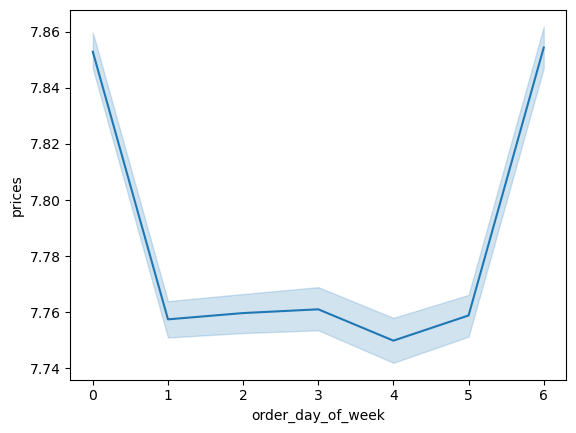

In [50]:
# create line chart from filtered sample
line_prices_week = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

### Task: Prices x Hour of Day

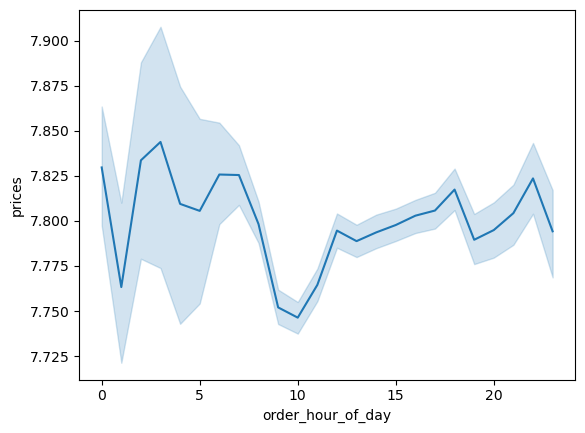

In [60]:
# create line chart from filtered sample
line_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

### Task: Age and number of dependents

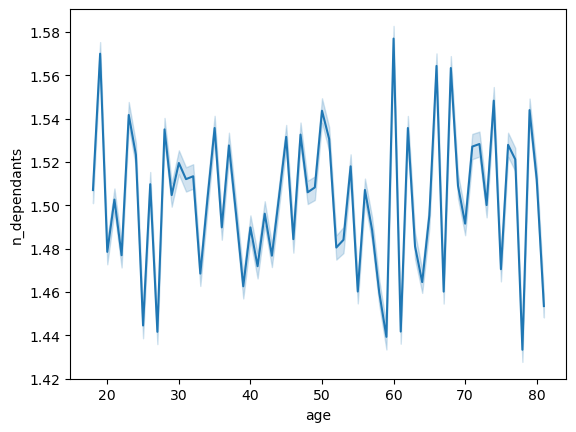

In [40]:
# create line chart from filtered sample
line_dep = sns.lineplot(data = df_4, x = 'age',y = 'n_dependants')

#### The line chart above shows the relationship between age and number of dependents. This is used to explore whether there is a connection between age and family size. At a glance, there does not appear to be a strong relationship between the two variables.

# 5. Export visualizations

In [51]:
# export figure
bar_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow.png'))

In [52]:
# export figure
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [53]:
# export figure
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [54]:
# export figure
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour.png'))

In [55]:
# export figure
scatter_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'))

In [56]:
# export figure
scatter_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income.png'))

In [61]:
# export figure
line_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))

In [58]:
# export figure
line_prices_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_week.png'))

In [59]:
# export figure
line_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dep.png'))